# Assignment 4
## Anuar Yeraliyev, 47382130

In this assignment we analyze the wavefunction and its roots obtained from a Schrodinger equation: 
$$ -\frac{\hbar^2}{2m} \frac{d^2\Psi(x)}{dx^2} + V(x)\Psi(x) = E\Psi(x) $$
in the anharmonic oscillator given by the equation:
$$ V(x) = -\alpha x^2 + \beta x^4 + \frac{\alpha^2}{4\beta} $$

We decompose the differential equation into 2 linear equations and use Runge-Kutta 4 method to propagate through the interval $[-0.6, 0.6]$ starting from the left. Initial conditions are: $\Psi(-x_0) = 0$ and $\Psi(-x_0) = 10^{-5}$.
$$ \begin{bmatrix}
    y_1      \\
    y_2       \\
\end{bmatrix}
 = 
\begin{bmatrix}
    \Psi(x)      \\
    \Psi'(x)       \\
\end{bmatrix}$$
$$ \begin{bmatrix}
    y_1'      \\
    y_2'       \\
\end{bmatrix}
 = 
\begin{bmatrix}
    \Psi'(x)      \\
    \Psi''(x)       \\
\end{bmatrix}$$

## Part 1.
The analytical solutions in the forbidden region take two linearly independent equations:
$$\Psi(x) = A e^{-\alpha x} \ and \ Be^{\alpha x} $$
where one solution blows up as x is increasing. In the case when one is solving it analytically, one can get rid of the non-normalizeable part and get physically sensible result. However, when we solve numerically we are not able to do it and we keep the "exploding" part.

The semi-log graph shows that $\Psi(x)$ and $\Psi'(x)$ are symmetric (odd) around $x=0$.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy as sp
from scipy import optimize

/Users/Anuar_The_Great/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Explicit 4-Order Runge-Kutta with constant step size
# Outputs vector y = [theta, velocity] and t 
def RK4(func, t_span, y0, h, E):
    #h = 0.01
    t0 = t_span[0]
    tf = t_span[1]
    
    iters = int(round((tf - t0)/ h))
    y = np.zeros((iters + 1, np.size(y0)))
        
    y[0, :] = y0
    for i in range(iters):
        k1 = func(t0 + (i)*h, y[i, :], E)
        k2 = func(t0 + (i)*h + h/2.0, y[i, :] + (h/2.0)*k1, E)
        k3 = func(t0 + (i)*h + h/2.0, y[i, :] + (h/2.0)*k2, E)
        k4 = func(t0 + (i)*h + h,     y[i, :] + h*k3, E)
        y[i+1, :] = y[i, :] + h/6.0 * (k1 + 2*k2 + 2*k3 + k4)               
        
    t = t0 + h*np.arange(iters + 1).T
    return y, t

In [3]:
def func(x, y, E):
    return np.array([y[1], y[0] * (2*m/hbar2) * (beta * x**4 - alpha * x**2 + alpha**2 / (4*beta) - E)])

def func2(E):
    return np.array([y[1], y[0] * (2*m/hbar2) * (alpha**2 / (4*beta) - E)])

hbar2 = 0.07619968
h = 0.0001
m = 1.0
alpha = 500.0
beta = 3500.0
E = 1.0
t_span = [-0.6, 0.6]
y0 = [0, 10**-5]
#psi, x = RK4(func, t_span, y0, h, E)

/Users/Anuar_The_Great/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


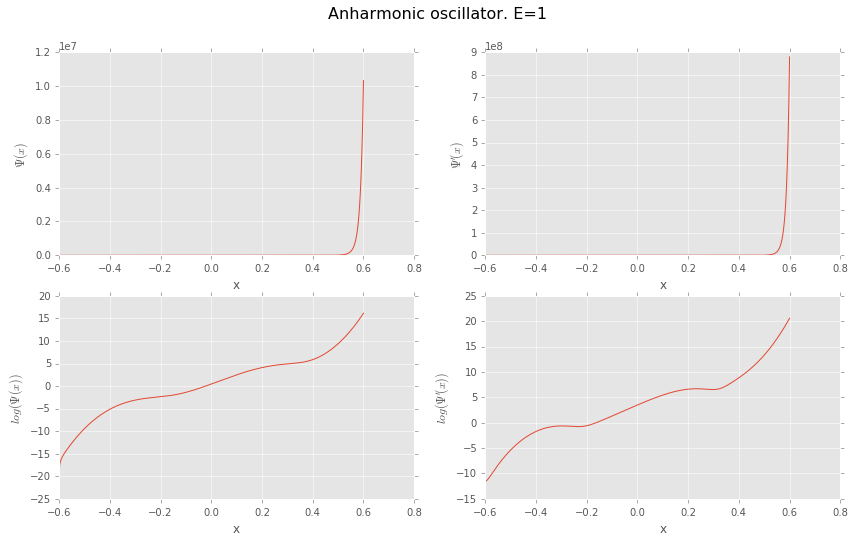

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
psi, x = RK4(func, t_span, y0, h, 1.0)
axs[0, 0].plot(x, psi[:, 0], label='\Psi(x)')
axs[0, 1].plot(x, psi[:, 1], label="\Psi'(x)")
axs[1, 0].plot(x, np.log(psi[:, 0]), label='\Psi(x)')
axs[1, 1].plot(x, np.log(psi[:, 1]), label="\Psi'(x)")
#axs[0, 0].set_title("Anharmonic oscillator. E=1")
axs[0, 0].set_xlabel('x')
axs[0, 1].set_xlabel('x')
axs[1, 0].set_xlabel('x')
axs[1, 1].set_xlabel('x')
fig.suptitle('Anharmonic oscillator. E=1', fontsize=16)
axs[0, 0].set_ylabel('$\Psi(x)$')
axs[0, 1].set_ylabel("$\Psi'(x)$")
axs[1, 0].set_ylabel('$log(\Psi(x))$')
axs[1, 1].set_ylabel("$log(\Psi'(x))$")

## Part 2.
Due to the symmetrical nature of the wavefunction we can only consider half of the interval, notably $[-x_0, 0]$. 

The definition of even and odd solutions can provide the boundary condition at the point $x=0$. In this case: 

Odd: $\Psi(x=0) = 0$  

Even: $\Psi'(x=0) = 0$  

## Part 3. Shooting method.
We shoot for the boundary conditions in even and odd cases that we found in part 2. We can find the energies by minimizing the difference between the two, but since the boundary values are zero, it means that it's equivalent to finding the root. The inital points for root finding were estimated manually.

In [5]:
t_span = [-0.6, 0.0]
def shooting_psi(E):
    psi, x = RK4(func, t_span, y0, h, E)
    return psi[-1, 0]

def shooting_psi_prime(E):
    psi, x = RK4(func, t_span, y0, h, E)
    return psi[-1, 1]

In [6]:
inits = [5, 16, 23]

odds = []
print("Odd:")
for i, init in enumerate(inits):
    odds.append(sp.optimize.fsolve(shooting_psi, init, xtol=10**-10)[0])
    print("\tEnergy: %.4f" % odds[i] + " eV")
    
evens = []
inits = [6, 15, 22]
print("Even:")
for i, init in enumerate(inits):
    evens.append(sp.optimize.fsolve(shooting_psi_prime, init, xtol=10**-10)[0])
    print("\tEnergy: %.4f" % evens[i] + " eV")

Odd:
	Energy: 5.8896 eV
	Energy: 16.6689 eV
	Energy: 27.6568 eV
Even:
	Energy: 5.8533 eV
	Energy: 15.3590 eV
	Energy: 22.5861 eV


We propagate through the interval $[-0.6, 0]$ and then use symmetry to obtain values on the other side.

Two lowest energy eigenstates span both local minima of the potential. Due to tunnelling, one can easily find the particle at one of the locations, the particle "is in two places at the same time".

In comparison, the energy of other eigenstates is higher than the bump at x=0, so they can easily overcome the local potential to get to the other side.

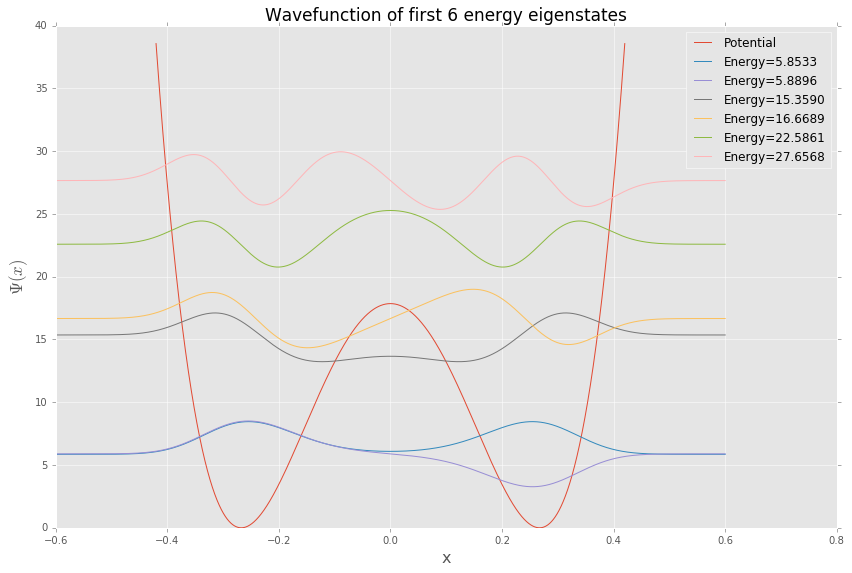

In [7]:
t_span = [-0.6, 0.0]
plt.figure(figsize=(14, 9))
x = np.linspace(-0.42, 0.42, x.shape[0]*2)
V = (beta * x**4 - alpha * x**2 + alpha**2 / (4*beta))
plt.plot(x, V, label='Potential')
for i in range(3):
    psi, x = RK4(func, t_span, y0, h, evens[i])
    one_side = (psi[:, 0] / np.sqrt(np.trapz(np.square(np.abs(psi[:, 0])), x))) + evens[i]
    one_side = one_side.reshape(-1, 1)
    two_sides = np.append(one_side, one_side[::-1])
    x = np.linspace(-0.6, 0.6, x.shape[0]*2)
    plt.plot(x, two_sides, label='Energy=%.4f' % evens[i])
    psi, x = RK4(func, t_span, y0, h, odds[i])
    one_side = (psi[:, 0] / np.sqrt(np.trapz(np.abs(psi[:, 0])**2, x)) )
    one_side = one_side.reshape(-1, 1)
    two_sides = np.append(one_side, -one_side[::-1])
    two_sides += odds[i]
    x = np.linspace(-0.6, 0.6, x.shape[0]*2)
    plt.plot(x, two_sides, label='Energy=%.4f' % odds[i])
plt.legend()
plt.title('Wavefunction of first 6 energy eigenstates', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('$\Psi(x)$', fontsize=17)

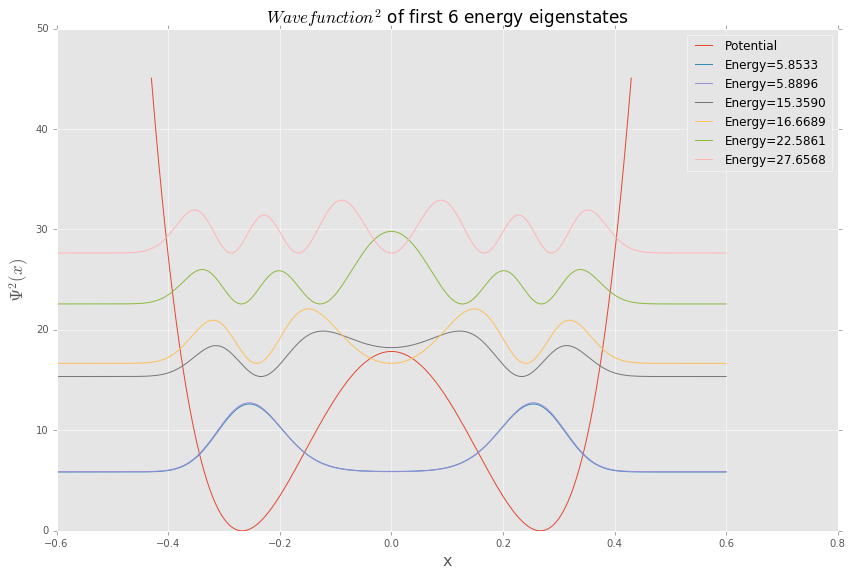

In [8]:
t_span = [-0.6, 0.0]
plt.figure(figsize=(14, 9))
x = np.linspace(-0.43, 0.43, x.shape[0]*2)
V = (beta * x**4 - alpha * x**2 + alpha**2 / (4*beta))
plt.plot(x, V, label='Potential')
for i in range(3):
    psi, x = RK4(func, t_span, y0, h, evens[i])
    one_side = (psi[:, 0]**2 / np.trapz(np.square(np.abs(psi[:, 0])), x)) + evens[i]
    one_side = one_side.reshape(-1, 1)
    two_sides = np.append(one_side, one_side[::-1])
    x = np.linspace(-0.6, 0.6, x.shape[0]*2)
    plt.plot(x, two_sides, label='Energy=%.4f' % evens[i])
    psi, x = RK4(func, t_span, y0, h, odds[i])
    one_side = (psi[:, 0]**2 / np.trapz(np.abs(psi[:, 0])**2, x)) 
    one_side = one_side.reshape(-1, 1)
    two_sides = np.append(one_side, one_side[::-1])
    two_sides += odds[i]
    x = np.linspace(-0.6, 0.6, x.shape[0]*2)
    plt.plot(x, two_sides, label='Energy=%.4f' % odds[i])
plt.legend()
plt.title('$Wavefunction^2$ of first 6 energy eigenstates', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('$\Psi^2(x)$', fontsize=17)